In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../../dist/base_123i.xlsx')

In [38]:
def fnc_Dummies(df):
    for cat_feature in df.select_dtypes(include=['object']).columns:
        df[cat_feature] = pd.Categorical(df[cat_feature]).codes
        df[cat_feature] = df[cat_feature].replace(-1,np.nan)
    return pd.DataFrame(df)

In [31]:
df_new = df[(df['rooms']>-1)&(df['point_estimate']>-1)&(df['garages']>-1)].copy()

In [37]:
df_new.head()

,city,state,address,tower_name,building_type,rooms,garages,useful_area,latitude,longitude,point_estimate,minimum_estimate,maximum_estimate
0,São Paulo,sp,"Alameda Itu, 254",Torre única,Apartamento,3,1,177,-23.56619840,-46.65689950,2111490,1794760,2428210
1,São Paulo,sp,"Alameda Santos, 1398",Torre única,Apartamento,2,1,65,-23.56387020,-46.65560060,608870,517539,700200
2,São Paulo,sp,"Avenida Paulista, 1195",Torre única,Apartamento,3,1,170,-23.56406910,-46.65356350,2102470,1787100,2417840
3,São Paulo,sp,"Avenida Paulista, 1195",Torre única,Apartamento,4,3,223,-23.56406910,-46.65356350,2757950,2344260,3171640
4,São Paulo,sp,"Alameda Santos, 1126",Torre única,Apartamento,3,1,100,-23.56533980,-46.65376750,1125720,956862,1294580


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19742 entries, 0 to 102556
Data columns (total 13 columns):
city                19742 non-null object
state               19742 non-null object
address             19742 non-null object
tower_name          19742 non-null object
building_type       19742 non-null object
rooms               19742 non-null int64
garages             19742 non-null int64
useful_area         19742 non-null int64
latitude            19742 non-null object
longitude           19742 non-null object
point_estimate      19742 non-null int64
minimum_estimate    19742 non-null int64
maximum_estimate    19742 non-null int64
dtypes: int64(6), object(7)
memory usage: 2.1+ MB


In [32]:
df_new.describe()

,rooms,garages,useful_area,point_estimate,minimum_estimate,maximum_estimate
count,19742.000000,19742.000000,19742.000000,1.974200e+04,1.974200e+04,1.974200e+04
mean,2.928832,2.255445,168.837251,1.917338e+06,1.621368e+06,2.216938e+06
std,0.915978,1.393661,134.835264,2.373717e+06,2.013528e+06,2.739075e+06
min,1.000000,1.000000,22.000000,1.607560e+05,1.340180e+05,1.848690e+05
25%,2.000000,1.000000,80.000000,7.311645e+05,6.179312e+05,8.473885e+05
50%,3.000000,2.000000,127.000000,1.210290e+06,1.024780e+06,1.400100e+06
75%,4.000000,3.000000,210.000000,2.158208e+06,1.827335e+06,2.495568e+06
max,8.000000,16.000000,1975.000000,4.773590e+07,4.200760e+07,5.394150e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002F04CEC4710>,
      dtype=object)

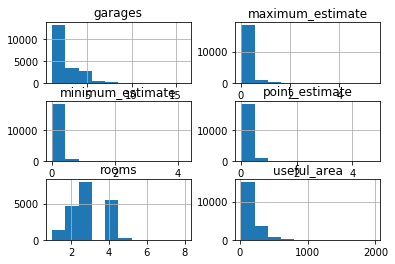

In [36]:
df_new.hist()

In [41]:
df_new_v2 = fnc_Dummies(df_new)

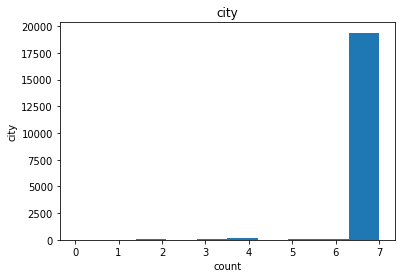

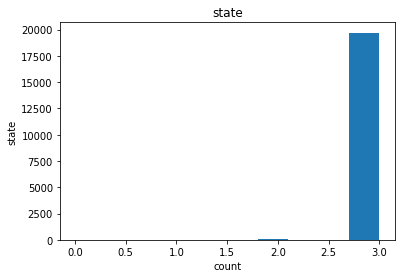

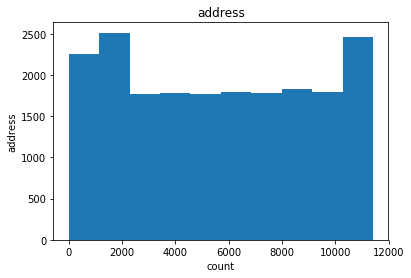

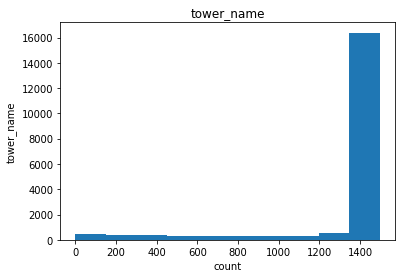

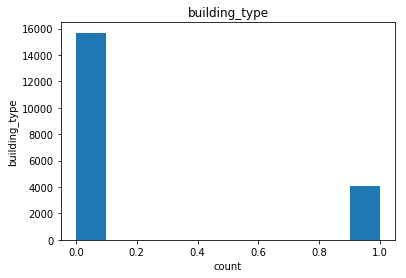

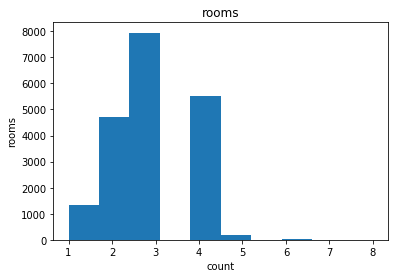

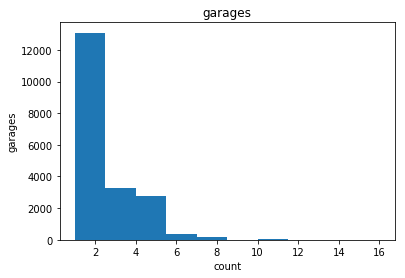

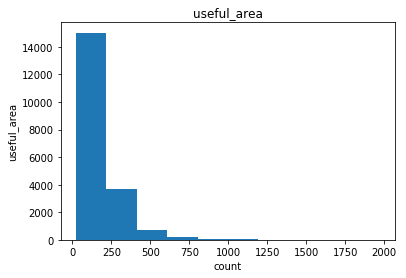

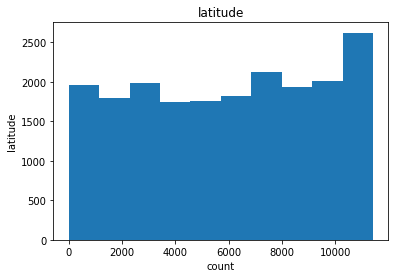

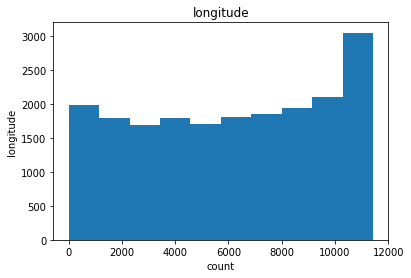

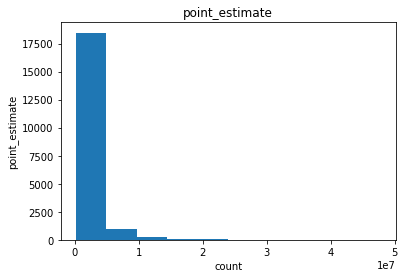

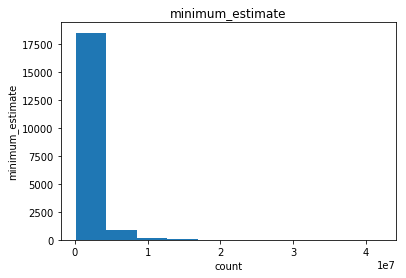

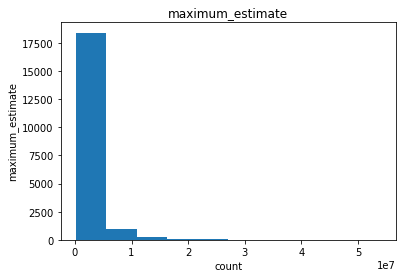

In [45]:
colunas = df_new_v2.columns

# Histogramas
for coluna in colunas:
    fig, ax = plt.subplots()
    plt.hist(df_new_v2[coluna])
    plt.ylabel(coluna)
    plt.xlabel('count')
    plt.title(coluna)

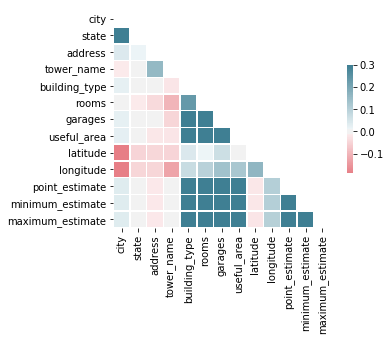

In [47]:
# Matriz de Correlação de Pearson
corr = df_new_v2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=False, annot_kws={"size": 15}, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
corr

,city,state,address,tower_name,building_type,rooms,garages,useful_area,latitude,longitude,point_estimate,minimum_estimate,maximum_estimate
city,1.000000,0.325745,0.041033,-0.012846,0.025949,-0.008750,0.023923,0.026966,-0.189234,-0.184565,0.035869,0.036426,0.035383
state,0.325745,1.000000,0.016187,-0.005663,0.006858,-0.012621,0.007588,0.000592,-0.049620,-0.045551,0.006026,0.005897,0.006155
address,0.041033,0.016187,1.000000,0.158479,0.007590,-0.038615,0.000804,-0.018312,-0.043048,-0.045536,-0.015179,-0.015290,-0.015033
tower_name,-0.012846,-0.005663,0.158479,1.000000,-0.020576,-0.097992,-0.045411,-0.020795,-0.049523,-0.128049,0.000744,-0.000345,0.001709
building_type,0.025949,0.006858,0.007590,-0.020576,1.000000,0.234704,0.410899,0.482680,0.042712,0.073585,0.357628,0.357755,0.357177
rooms,-0.008750,-0.012621,-0.038615,-0.097992,0.234704,1.000000,0.651369,0.629489,0.011505,0.098699,0.473961,0.473616,0.473927
garages,0.023923,0.007588,0.000804,-0.045411,0.410899,0.651369,1.000000,0.790724,0.065881,0.136143,0.709306,0.709375,0.708815
useful_area,0.026966,0.000592,-0.018312,-0.020795,0.482680,0.629489,0.790724,1.000000,-0.000889,0.125939,0.876838,0.876474,0.876665
latitude,-0.189234,-0.049620,-0.043048,-0.049523,0.042712,0.011505,0.065881,-0.000889,1.000000,0.164555,-0.018255,-0.016987,-0.019374
longitude,-0.184565,-0.045551,-0.045536,-0.128049,0.073585,0.098699,0.136143,0.125939,0.164555,1.000000,0.105368,0.105983,0.104714
